<a href="https://colab.research.google.com/github/Fuenfgeld/DMA2023TeamC/blob/main/Datenbank/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA
Explorative Data Analysis



In [70]:
# install the newest version 
!pip3 install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


# Importing Libraries

In [71]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas_profiling import ProfileReport
import pandas_profiling

In [72]:
# will make plot outputs appear and stored within the notebook.
%matplotlib inline

In [73]:
from google.colab import drive
# mount drive to access database
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
#material_path = "/content/drive/Shareddrives/05_BIDS_Datenmanagement & Archivierung im Umfeld der Forschung/Material"

In [75]:
# list of datawarehoses
#!ls "/content/drive/Shareddrives/05_BIDS_Datenmanagement & Archivierung im Umfeld der Forschung/Material/DWH_dbs"


# Loading Data


In [76]:
# type of patient
patient_type = "metebolic_syndrome_disease"

In [77]:
# datawarehouse path
DB_DWH_PATH = "/content/drive/Shareddrives/TeamC/teamc_dwh.db"
print("Datawarehouse: ", DB_DWH_PATH)
# connect to db
dwh_conn = sqlite3.connect(DB_DWH_PATH)

Datawarehouse:  /content/drive/Shareddrives/TeamC/teamc_dwh.db


In [78]:
# list of tables in db
if dwh_conn is not None:
  dwh_cursor = dwh_conn.cursor()
  dwh_cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
  print("List of Tables", dwh_cursor.fetchall())


List of Tables [('patients_info',), ('conditions_info',), ('medications_info',), ('med_codes',), ('conditions_codes',), ('pseudo',)]


In [79]:
# Read sqlite query results into a pandas DataFrame

# demographic data
df_patients = pd.read_sql_query("SELECT * FROM patients_info", dwh_conn)

# diagnoses data
df_conditions = pd.read_sql_query("select * from conditions_info", dwh_conn)

# medications data
df_medications = pd.read_sql_query("SELECT * FROM medications_info", dwh_conn)

# medications codes data
df_med_codes = pd.read_sql_query("SELECT * FROM med_codes", dwh_conn)

# conditions codes data
df_conditions_codes = pd.read_sql_query("SELECT * FROM conditions_codes", dwh_conn)


In [80]:
# close db connection
dwh_conn.close()


# Exploratory Data Analysis (EDA)


In [81]:
ProfileReport(df_patients)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [82]:
df_patients.head()

,Id,BIRTHDATE,DEATHDATE,RACE,ETHNICITY
0,eWfRN7t4bETlJJIRjszW,1982-09-20,None,white,nonhispanic
1,HuZSgTcoH2S3NwO405Tb,2012-07-11,None,white,nonhispanic
2,vDCtW6u40NMgL1P7cnS0,1997-07-22,None,white,hispanic
3,5C8eQwwSyclWEtPt1Hp6,1994-12-07,None,white,nonhispanic
4,Th505UM5GdgByXx9KvK5,1971-04-05,None,white,nonhispanic


In [83]:
df_patients.columns

Index(['Id', 'BIRTHDATE', 'DEATHDATE', 'RACE', 'ETHNICITY'], dtype='object')

In [84]:
df_patients.shape

(1028, 5)

In [85]:
# # replacing blank values (with space) with NAN
df_patients = df_patients.replace(r'^\s*$', np.nan, regex=True)

In [86]:
df_patients.isnull().sum()

Id              0
BIRTHDATE       0
DEATHDATE    1000
RACE            0
ETHNICITY       0
dtype: int64

In [87]:
df_patients.DEATHDATE.isnull().sum()

1000

In [88]:
# fill nall values with todays date
df_patients["DEATHDATE"] = df_patients.DEATHDATE.fillna(pd.to_datetime("today"))
# convert to datetime
df_patients["DEATHDATE"] = pd.to_datetime(df_patients["DEATHDATE"])
df_patients["BIRTHDATE"] = pd.to_datetime(df_patients["BIRTHDATE"])

# # calculate age 
df_patients["AGE"] = df_patients.DEATHDATE.dt.year - df_patients.BIRTHDATE.dt.year
## select variables
df_patients = df_patients[["Id", "AGE", "ETHNICITY", "RACE"]]



In [89]:
df_patients.head()


,Id,AGE,ETHNICITY,RACE
0,eWfRN7t4bETlJJIRjszW,41,nonhispanic,white
1,HuZSgTcoH2S3NwO405Tb,11,nonhispanic,white
2,vDCtW6u40NMgL1P7cnS0,26,hispanic,white
3,5C8eQwwSyclWEtPt1Hp6,29,nonhispanic,white
4,Th505UM5GdgByXx9KvK5,52,nonhispanic,white


In [90]:
df_conditions.head()

,START,STOP,PATIENT,CODE
0,2007-11-29,None,Jc54M5bkNqh5NRSpt2d6,53741008
1,2011-06-09,None,Jc54M5bkNqh5NRSpt2d6,22298006
2,2011-06-09,None,Jc54M5bkNqh5NRSpt2d6,399211009
3,2016-08-25,None,eDAV9G9dvGMor87zWSJF,410429000
4,2016-08-25,None,eDAV9G9dvGMor87zWSJF,429007001


In [91]:
ProfileReport(df_conditions)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [92]:
# rename some columns for clarification
df_conditions.rename(columns={"CODE": "CODE_CONDITION", "START": "START_CONDITION", "STOP" : "STOP_CONDITION"}, inplace=True)

# replacing blank values (with space) with NAN
df_conditions = df_conditions.replace(r'^\s*$', np.nan, regex=True)

# fill null values
df_conditions["STOP_CONDITION"] = df_conditions.STOP_CONDITION.fillna(pd.to_datetime("today"))

# convert to datetime
df_conditions["START_CONDITION"] = pd.to_datetime(df_conditions["START_CONDITION"])
df_conditions["STOP_CONDITION"] = pd.to_datetime(df_conditions["STOP_CONDITION"])

# calculate duration of a diagnose
df_conditions["DURATION_CONDITION"] = df_conditions.STOP_CONDITION.dt.to_period("M").astype(int) - df_conditions.START_CONDITION.dt.to_period("M").astype(int)

# remove unnecessary variables
#df_conditions.drop(['START', 'STOP'], axis=1, inplace=True)

<ipython-input-92-881efbb7751a>:15: FutureWarning: casting period[M] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df_conditions["DURATION_CONDITION"] = df_conditions.STOP_CONDITION.dt.to_period("M").astype(int) - df_conditions.START_CONDITION.dt.to_period("M").astype(int)


In [93]:
df_conditions.shape

(203, 5)

In [94]:
# join two datasets
df = pd.DataFrame.merge(df_patients, df_conditions, left_on="Id", right_on="PATIENT", how="left")
df.drop("PATIENT", axis=1, inplace=True)
df.shape

(1116, 8)

In [95]:
df.head()

,Id,AGE,ETHNICITY,RACE,START_CONDITION,STOP_CONDITION,CODE_CONDITION,DURATION_CONDITION
0,eWfRN7t4bETlJJIRjszW,41,nonhispanic,white,NaT,NaT,NaN,NaN
1,HuZSgTcoH2S3NwO405Tb,11,nonhispanic,white,NaT,NaT,NaN,NaN
2,vDCtW6u40NMgL1P7cnS0,26,hispanic,white,NaT,NaT,NaN,NaN
3,5C8eQwwSyclWEtPt1Hp6,29,nonhispanic,white,NaT,NaT,NaN,NaN
4,Th505UM5GdgByXx9KvK5,52,nonhispanic,white,NaT,NaT,NaN,NaN


In [96]:
ProfileReport(df_medications)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [97]:
df_medications.head()

,START,STOP,PATIENT,CODE
0,2007-11-29T14:30:10Z,2011-06-09T14:45:10Z,Jc54M5bkNqh5NRSpt2d6,309362
1,2007-11-29T14:30:10Z,None,Jc54M5bkNqh5NRSpt2d6,312961
2,2007-11-29T14:30:10Z,None,Jc54M5bkNqh5NRSpt2d6,197361
3,2007-11-29T14:30:10Z,2011-06-09T14:45:10Z,Jc54M5bkNqh5NRSpt2d6,705129
4,2011-06-09T14:30:10Z,2011-06-09T14:45:10Z,Jc54M5bkNqh5NRSpt2d6,259255


In [98]:
# rename variables
df_medications.rename(columns={"CODE":"CODE_MEDICATION",
                               "START" : "START_MEDICATION",
                               "STOP" : "STOP_MEDICATION"}, inplace=True)


# replacing blank values (with space) with NAN
df_medications = df_medications.replace(r'^\s*$', np.nan, regex=True)

# fill null values
df_medications["STOP_MEDICATION"] = df_medications.STOP_MEDICATION.fillna(pd.to_datetime("today"))

# convert to datetime
df_medications["START_MEDICATION"] = pd.to_datetime(df_medications["START_MEDICATION"])
df_medications["STOP_MEDICATION"] = pd.to_datetime(df_medications["STOP_MEDICATION"])

# calculate duration of a diagnose
df_medications["DURATION_MEDICATION"] = df_medications.STOP_MEDICATION.dt.to_period("M").astype(int) - df_medications.START_MEDICATION.dt.to_period("M").astype(int)

/usr/local/lib/python3.8/dist-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
<ipython-input-98-0b104e9d6699>:18: FutureWarning: casting period[M] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df_medications["DURATION_MEDICATION"] = df_medications.STOP_MEDICATION.dt.to_period("M").astype(int) - df_medications.START_MEDICATION.dt.to_period("M").astype(int)


In [99]:
df = pd.DataFrame.merge(df, df_medications, left_on="Id", right_on="PATIENT", how="left")
df.drop("PATIENT", axis=1, inplace=True)
df.shape

(1659, 12)

In [100]:
ProfileReport(df_med_codes)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [101]:
df_med_codes.columns

Index(['CODE', 'DESCRIPTION'], dtype='object')

In [102]:
df_med_codes.shape

(13, 2)

In [103]:
# rename variables
df_med_codes.rename(columns={"DESCRIPTION" : "DESCRIPTION_MEDICATION"}, inplace=True)

In [104]:
# join two datasets
df = pd.DataFrame.merge(df, df_med_codes, left_on="CODE_MEDICATION", right_on="CODE", how="left")
df.drop("CODE", axis=1, inplace=True)
df.shape

(1659, 13)

In [105]:
ProfileReport(df_conditions_codes)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [106]:
df_conditions_codes.head(5)

,CODE,DESCRIPTION
0,22298006,Myocardial Infarction
1,49436004,Atrial Fibrillation
2,53741008,Coronary Heart Disease
3,230690007,Stroke
4,399211009,History of myocardial infarction (situation)


In [107]:
df_conditions_codes.shape

(7, 2)

In [108]:
df_conditions_codes.columns

Index(['CODE', 'DESCRIPTION'], dtype='object')

In [109]:
# rename variables
df_conditions_codes.rename(columns={"DESCRIPTION" : "DESCRIPTION_CONDITION"}, inplace=True)

In [110]:
# join two datasets
df = pd.DataFrame.merge(df, df_conditions_codes, left_on="CODE_CONDITION", right_on="CODE", how="left")
df.drop("CODE", axis=1, inplace=True)
df.shape

(1659, 14)

## Understanding Data/Basic Data Exploration


In [111]:
# .head() returns the first 5 rows of my dataset. This is useful if you want to see some example values for each variable.
df.head()

,Id,AGE,ETHNICITY,RACE,START_CONDITION,STOP_CONDITION,CODE_CONDITION,DURATION_CONDITION,START_MEDICATION,STOP_MEDICATION,CODE_MEDICATION,DURATION_MEDICATION,DESCRIPTION_MEDICATION,DESCRIPTION_CONDITION
0,eWfRN7t4bETlJJIRjszW,41,nonhispanic,white,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1,HuZSgTcoH2S3NwO405Tb,11,nonhispanic,white,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
2,vDCtW6u40NMgL1P7cnS0,26,hispanic,white,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
3,5C8eQwwSyclWEtPt1Hp6,29,nonhispanic,white,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
4,Th505UM5GdgByXx9KvK5,52,nonhispanic,white,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN


In [112]:
# .shape returns the number of rows by the number of columns
#size of dataset
df.shape

(1659, 14)

In [113]:
# .columns returns the name of all of your columns in the dataset.
df.columns

Index(['Id', 'AGE', 'ETHNICITY', 'RACE', 'START_CONDITION', 'STOP_CONDITION',
       'CODE_CONDITION', 'DURATION_CONDITION', 'START_MEDICATION',
       'STOP_MEDICATION', 'CODE_MEDICATION', 'DURATION_MEDICATION',
       'DESCRIPTION_MEDICATION', 'DESCRIPTION_CONDITION'],
      dtype='object')

In [114]:
# attribute type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 0 to 1658
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   Id                      1659 non-null   object             
 1   AGE                     1659 non-null   int64              
 2   ETHNICITY               1659 non-null   object             
 3   RACE                    1659 non-null   object             
 4   START_CONDITION         746 non-null    datetime64[ns]     
 5   STOP_CONDITION          746 non-null    datetime64[ns]     
 6   CODE_CONDITION          746 non-null    float64            
 7   DURATION_CONDITION      746 non-null    float64            
 8   START_MEDICATION        696 non-null    datetime64[ns, UTC]
 9   STOP_MEDICATION         696 non-null    datetime64[ns, UTC]
 10  CODE_MEDICATION         696 non-null    float64            
 11  DURATION_MEDICATION     696 non-null    flo

In [115]:
# .describe summarizes the count, mean, standard deviation, min, and max for numerical variables.
df.describe()

,AGE,CODE_CONDITION,DURATION_CONDITION,CODE_MEDICATION,DURATION_MEDICATION
count,1659.000000,7.460000e+02,746.000000,6.960000e+02,696.000000
mean,48.535865,2.098224e+08,257.286863,6.742729e+05,137.646552
std,23.691913,1.700530e+08,184.914951,4.707021e+05,159.868638
min,3.000000,2.229801e+07,31.000000,1.973610e+05,0.000000
25%,29.000000,5.374101e+07,90.000000,3.093620e+05,0.000000
50%,47.000000,2.306900e+08,220.000000,7.051290e+05,80.000000
75%,66.000000,4.104290e+08,375.000000,8.553320e+05,239.250000
max,110.000000,4.290070e+08,832.000000,1.804799e+06,776.000000


In [116]:
# .nunique(axis=0) returns the number of unique values for each variable.
df.nunique(axis=0)


Id                        1028
AGE                         98
ETHNICITY                    2
RACE                         5
START_CONDITION            152
STOP_CONDITION               1
CODE_CONDITION               7
DURATION_CONDITION         129
START_MEDICATION           151
STOP_MEDICATION             56
CODE_MEDICATION             13
DURATION_MEDICATION         92
DESCRIPTION_MEDICATION      13
DESCRIPTION_CONDITION        7
dtype: int64

## Cleaning Dataset


### Removing Duplicate Rows


In [117]:
print("Number of Duplicated Rows", df.duplicated(df.columns).sum())

Number of Duplicated Rows 0


### Removing Missing Values

For the purposes of our research question the missing value rows stay.
the missing value rows mean, the patient has no conditions or doesn't take any medication.

In [118]:
# number of null values in each column
df.isnull().sum()

Id                          0
AGE                         0
ETHNICITY                   0
RACE                        0
START_CONDITION           913
STOP_CONDITION            913
CODE_CONDITION            913
DURATION_CONDITION        913
START_MEDICATION          963
STOP_MEDICATION           963
CODE_MEDICATION           963
DURATION_MEDICATION       963
DESCRIPTION_MEDICATION    963
DESCRIPTION_CONDITION     913
dtype: int64

In [119]:
# for the purposes of our reseatch question the missing value rows stay.
# the missing value rows mean, the patient has no additional conditions or doesn't take
# any medication.


## Univariate Analysis

### Grouping

Get the number of elements per group using .size method

In [120]:
# number of patients in procedure table
df.groupby(["Id"]).size()

Id
01viGBWP50rp81sYTjRP    1
074RNaR04y7UbBKP2U23    1
07G9mpGboToEGMk9MTb4    1
0ANx5gmFOx0SF5pbenah    1
0DAQ5ZjdgYYuUxX3VDzp    1
                       ..
zYF0qED0Vzs8QqVtQTzj    1
zYtLAWhhatiiDE93Vz47    1
zhHjLSqpfJ1HukUDETYR    1
zqL9sjI83dBMAoO65Pxh    1
zssS6BRJVs4EcpXextW1    2
Length: 1028, dtype: int64

In [121]:
df.groupby(["Id", "CODE_CONDITION"]).size()

Id                    CODE_CONDITION
0DKPqeOLxenApyfHDzJY  53741008.0        4
0bCX2UrD5dCmpiwIJl07  53741008.0        4
2Oeasmax6wyUoycrCbIB  49436004.0        3
2hZkhXWTJyh59t9EPDXE  53741008.0        4
                      410429000.0       4
                                       ..
y0mHTk7v6i7cuAVjzfRO  49436004.0        9
                      53741008.0        9
                      230690007.0       9
ydVKEOiZLoZ5OydRmdhp  49436004.0        3
zssS6BRJVs4EcpXextW1  230690007.0       2
Length: 203, dtype: int64

In [122]:
df.groupby(["Id", "CODE_MEDICATION"]).size()

Id                    CODE_MEDICATION
0DKPqeOLxenApyfHDzJY  197361.0           1
                      309362.0           1
                      312961.0           1
                      705129.0           1
0bCX2UrD5dCmpiwIJl07  197361.0           1
                                        ..
ydVKEOiZLoZ5OydRmdhp  197604.0           1
                      855332.0           1
                      897718.0           1
zssS6BRJVs4EcpXextW1  309362.0           1
                      1804799.0          1
Length: 311, dtype: int64

Now we'll group the patients and sum up the amount of their different medication and conditions.

In [123]:
pat_med = pd.DataFrame.merge(df_patients, df_medications, left_on="Id", right_on="PATIENT", how="left")
pat_med.drop("PATIENT", axis=1, inplace=True)

moddf_med= pat_med.groupby(['Id'])['CODE_MEDICATION'].count().reset_index(name = 'medications')
moddf_med

,Id,medications
0,01viGBWP50rp81sYTjRP,0
1,074RNaR04y7UbBKP2U23,0
2,07G9mpGboToEGMk9MTb4,0
3,0ANx5gmFOx0SF5pbenah,0
4,0DAQ5ZjdgYYuUxX3VDzp,0
...,...,...
1023,zYF0qED0Vzs8QqVtQTzj,0
1024,zYtLAWhhatiiDE93Vz47,0
1025,zhHjLSqpfJ1HukUDETYR,0
1026,zqL9sjI83dBMAoO65Pxh,0


In [124]:
pat_con = pd.DataFrame.merge(df_patients, df_conditions, left_on="Id", right_on="PATIENT", how="left")
pat_con.drop("PATIENT", axis=1, inplace=True)


moddf = pat_con.groupby(['Id'])['CODE_CONDITION'].count().reset_index(name = 'additional_conditions')

moddf

,Id,additional_conditions
0,01viGBWP50rp81sYTjRP,0
1,074RNaR04y7UbBKP2U23,0
2,07G9mpGboToEGMk9MTb4,0
3,0ANx5gmFOx0SF5pbenah,0
4,0DAQ5ZjdgYYuUxX3VDzp,0
...,...,...
1023,zYF0qED0Vzs8QqVtQTzj,0
1024,zYtLAWhhatiiDE93Vz47,0
1025,zhHjLSqpfJ1HukUDETYR,0
1026,zqL9sjI83dBMAoO65Pxh,0


For some patients, there are more than one diagnose code and medication code. However, for the most, the number of additional conditions, as well as the number of different drugs, seems to be 0.





# Plotting the data

## Histogram



Now the amount of different additional conditions will be plotted on a histogram. The following bars show the amount of patients having a specified number of additional conditions.

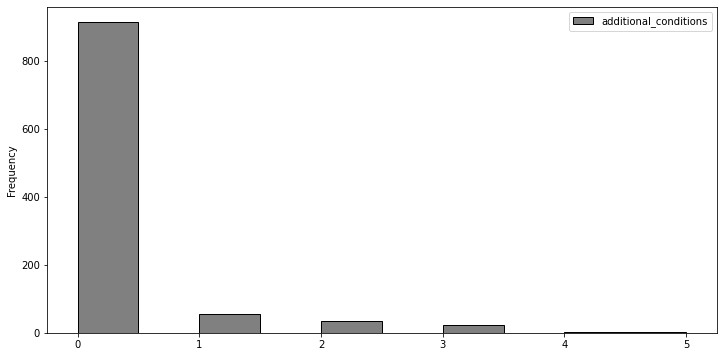

In [125]:
moddf.plot.hist(figsize=(12,6), facecolor='grey',edgecolor='black', bins = 10)



As is to be seen above, the bulk of the patients do not have any accompanying conditions. Now, the very same histogram after dropping the ones with 0, just for better clarity.

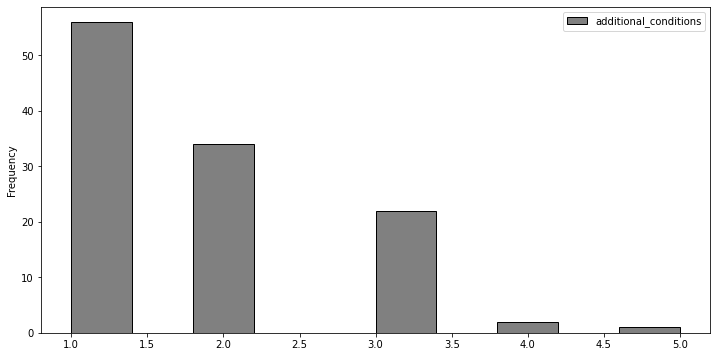

In [126]:
moddf = moddf[moddf['additional_conditions'] > 0]
moddf.plot.hist(figsize=(12,6), facecolor='grey',edgecolor='black')

Now the amount of different medications will be plotted on a histogram. The following bars show the amount of patients having a specified number of medications.

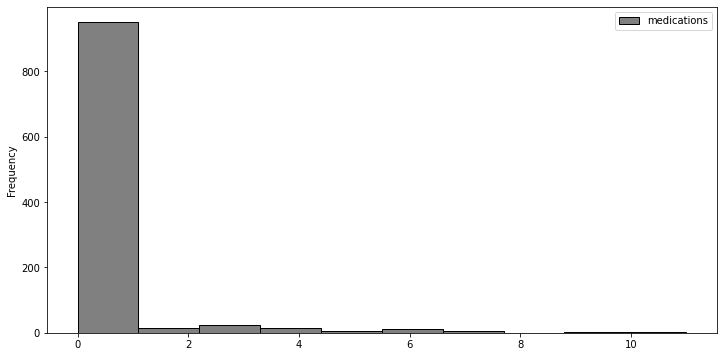

In [127]:
moddf_med.plot.hist(figsize=(12,6), facecolor='grey',edgecolor='black', bins = 10)

And again, just for clarity, now the same histogram after dropping the patients with 0 medications

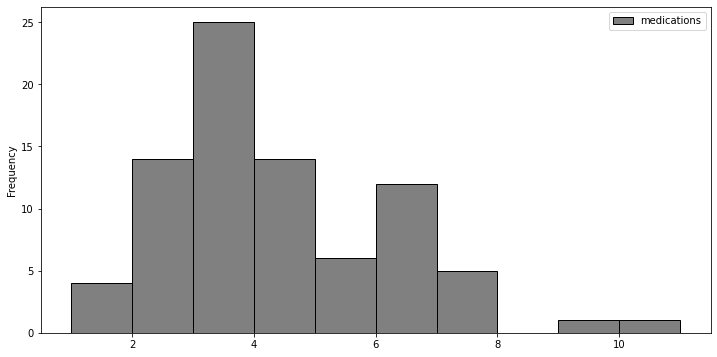

In [128]:
moddf_med = moddf_med[moddf_med['medications'] > 0]
moddf_med.plot.hist(figsize=(12,6), facecolor='grey',edgecolor='black')

Now, for the purposes of our research question, the patients will be grouped according to their race and ethnicity. The number of people for each group will be shown.

In [129]:
rac_eth = df_patients.groupby(['RACE', 'ETHNICITY'])['Id'].count().reset_index(name = 'count')

rac_eth

,RACE,ETHNICITY,count
0,asian,hispanic,4
1,asian,nonhispanic,67
2,black,hispanic,19
3,black,nonhispanic,71
4,native,hispanic,1
5,native,nonhispanic,5
6,other,nonhispanic,1
7,white,hispanic,93
8,white,nonhispanic,767


The above data will now be shown on a histogram to visualize things.

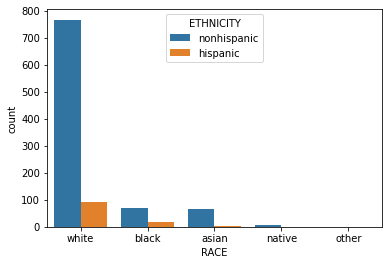

In [130]:
sns.countplot(data = df_patients, x = 'RACE', hue = 'ETHNICITY')

It is now clear, that some groups are much more represented that the others. What this means, is that it's possible, that some of the groups will be to small to enable proper analysis.

## Distribution of the 'race' value

The following graph shows the ditribution of different 'race' values within the dataset.

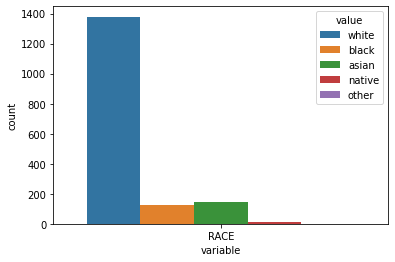

In [131]:
# distribution of RACE attribute
sns.countplot(x="variable", hue= "value", data=pd.melt(df[["RACE"]]))

## Distribution of the 'Ethnicity' value

The following graph shows the ditribution of different 'ethnicity' values within the dataset.

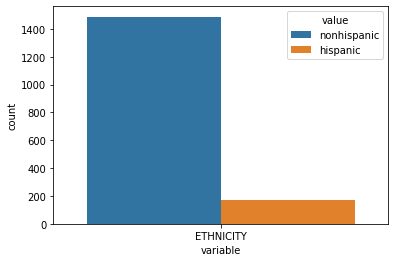

In [139]:
# distribution of RACE attribute
sns.countplot(x="variable", hue= "value", data=pd.melt(df[["ETHNICITY"]]))

### Average numbers of conditions and medications, Outliers
Now new tables will be created with average number of conditions for every group of the above.
 
First, it will be done with conditions and then with medications.

Outliers will be dropped for better clarity od the analysis.

In [133]:
# mean conditions count when grouped by race and ethnicity

meancon = pat_con[['Id', 'RACE', 'ETHNICITY', 'CODE_CONDITION']]

#add a column to give sum of conditions per person
meancon["con_count"] = meancon.groupby('Id')["CODE_CONDITION"].transform("count")

#drop the code_condition column
meancon = meancon.drop(columns = 'CODE_CONDITION')

#drop the duplicates
meancon = meancon.drop_duplicates()

#add a new column with the mean of conditions a patient in every group has
meancon["mean_con"] = meancon.groupby(['RACE', 'ETHNICITY'])["con_count"].transform("mean")

#drop the Id and con_count columns
meancon = meancon.drop(columns=['con_count', 'Id'])

#drop the duplicates so that only the division in race and ethnicity remains, then sort
meancon = meancon.drop_duplicates()
meancon = meancon.sort_values(by = ['RACE', 'ETHNICITY'])
meancon


<ipython-input-133-6148ef73f133>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meancon["con_count"] = meancon.groupby('Id')["CODE_CONDITION"].transform("count")


,RACE,ETHNICITY,mean_con
31,asian,hispanic,0.000000
8,asian,nonhispanic,0.283582
46,black,hispanic,0.000000
5,black,nonhispanic,0.239437
1043,native,hispanic,0.000000
278,native,nonhispanic,0.800000
964,other,nonhispanic,0.000000
2,white,hispanic,0.193548
0,white,nonhispanic,0.189048


It is clear, that the groups with **0 mean conditions** were simply too small for any additional condition to berecorded. Those need to be dropped

In [134]:
# dropping the groups with 0 mean conditions

meancon = meancon[(meancon.mean_con > 0)]
meancon

,RACE,ETHNICITY,mean_con
8,asian,nonhispanic,0.283582
5,black,nonhispanic,0.239437
278,native,nonhispanic,0.800000
2,white,hispanic,0.193548
0,white,nonhispanic,0.189048


Now repeat the process for the medications to see what is the average number of meds that every group takes.

In [135]:
meanmed = pat_med[['Id', 'RACE', 'ETHNICITY', 'CODE_MEDICATION']]

#add a column to give sum of conditions per person
meanmed["med_count"] = meanmed.groupby('Id')["CODE_MEDICATION"].transform("count")

#drop the code_condition column
meanmed = meanmed.drop(columns = 'CODE_MEDICATION')

#drop the duplicates
meanmed = meanmed.drop_duplicates()

#add a new column with the mean of conditions a patient in every group has
meanmed["mean_med"] = meanmed.groupby(['RACE', 'ETHNICITY'])["med_count"].transform("mean")

#drop the Id and con_count columns
meanmed = meanmed.drop(columns=['med_count', 'Id'])

#drop the duplicates so that only the division in race and ethnicity remains, then sort
meanmed = meanmed.drop_duplicates()
meanmed = meanmed.sort_values(by = ['RACE', 'ETHNICITY'])
meanmed

<ipython-input-135-f7c3da4ed176>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meanmed["med_count"] = meanmed.groupby('Id')["CODE_MEDICATION"].transform("count")


,RACE,ETHNICITY,mean_med
34,asian,hispanic,0.000000
8,asian,nonhispanic,0.522388
50,black,hispanic,0.000000
5,black,nonhispanic,0.197183
1181,native,hispanic,0.000000
335,native,nonhispanic,1.000000
1093,other,nonhispanic,0.000000
2,white,hispanic,0.322581
0,white,nonhispanic,0.307692


It is clear, that **the groups with 0 mean medications** were simply too small for any medication to be recorded. The **native nonhispanic group** is also an outlier, which can also be attributed to a too small
patient group. Those groups need to be dropped

In [136]:
# dropping the groups

meanmed = meanmed[(meanmed.mean_med > 0) & (meanmed.mean_med != 1)]

meanmed

,RACE,ETHNICITY,mean_med
8,asian,nonhispanic,0.522388
5,black,nonhispanic,0.197183
2,white,hispanic,0.322581
0,white,nonhispanic,0.307692


## Mean additional conditions

First, mean additional conditions will be plotted for every group (after dropping the most obvious outliers)

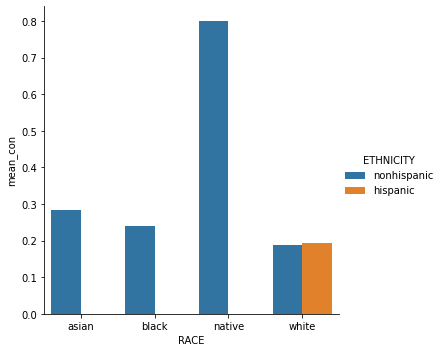

In [137]:
# mean mconditions number plotted against race and ethnicity
sns.catplot(data = meancon, x = 'RACE', y='mean_con', hue = 'ETHNICITY', kind='bar')

From the above graph it is clear, that because the hispanic ethnicity is only largely enough represented in the 'white' race, it cannot be used to answer the question on whether it influences the morbidity
The 'native' race hat the highest average number of conditions, most possibly it's due to the underrepresentation of this group in the dataset.

## Mean medications

Now, mean medications will be plotted for every group (after dropping the most obvious outliers)

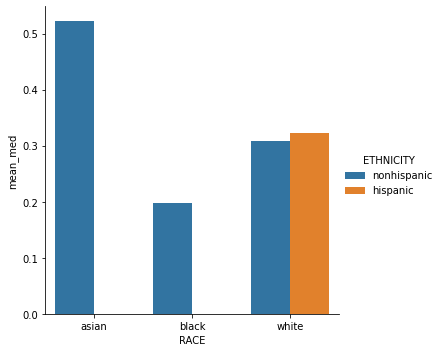

In [138]:
sns.catplot(data = meanmed, x = 'RACE', y='mean_med', hue = 'ETHNICITY', kind='bar')